### Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import re

### Import NLP Tools

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

### Model Training Tools

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

### Import Machine Learning Models

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

### Import Evaluation Metrics

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Handle Class Imbalance

In [7]:
from imblearn.over_sampling import SMOTE

### Download Stopwords

In [8]:
# Download NLTK resources.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rutvik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load Datasets

In [9]:
# Load the dataset.
df = pd.read_csv("C:/Users/Rutvik/OneDrive/Desktop/CODESOFT INTERNSHIP TASK/CODESOFT_Task4_Spam_SMS_Detection/SMS Spam Collection Dataset/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

### Initialize NLP Tools

In [10]:
# Preprocess the text data using porter stemming and removing stop words.
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

### Text Cleaning Function

In [11]:
# Function to clean and preprocess text data.
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

### Apply Cleaning

In [12]:
# Apply the cleaning function to the text column.
df['cleaned_text'] = df['text'].apply(clean_text)

### Encode Labels

In [13]:
# Convert labels to numerical values for modeling.
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

### TF-IDF Vectorization

In [14]:
# Create TF-IDF features from the cleaned text and prepare the target variable and features.
tfidf = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label_num']

### Train-Test Split

In [15]:
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Balance Classes with SMOTE

In [16]:
# Handle class imbalance using SMOTE.
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Model Training and Evaluation

##### Naive Bayes Model

In [17]:
# Train and evaluate a Naive Bayes model with hyperparameter tuning.
nb_params = {'alpha': [0.1, 0.5, 1.0]}
grid_nb = GridSearchCV(MultinomialNB(), param_grid=nb_params, cv=5)
grid_nb.fit(X_train, y_train)
y_pred_nb = grid_nb.predict(X_test)

In [18]:
# Print the results for Naive Bayes model.
print("=== Naive Bayes ===")
print("\nBest Params:", grid_nb.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

=== Naive Bayes ===

Best Params: {'alpha': 0.1}

Accuracy: 0.9614349775784753

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       965
           1       0.84      0.89      0.86       150

    accuracy                           0.96      1115
   macro avg       0.91      0.93      0.92      1115
weighted avg       0.96      0.96      0.96      1115



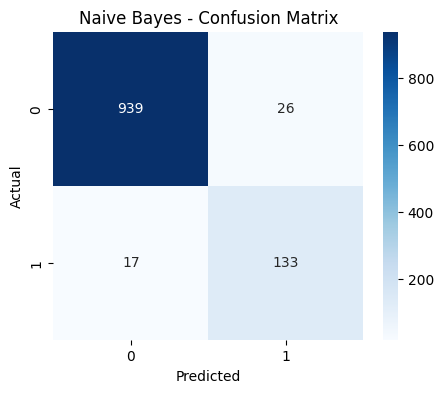

In [19]:
# Plot confusion matrix for Naive Bayes model.
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Logistic Regression Model

In [20]:
# Train and evaluate a Logistic Regression model with hyperparameter tuning.
lr_params = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=lr_params, cv=5)
grid_lr.fit(X_train, y_train)
y_pred_lr = grid_lr.predict(X_test)

In [21]:
# Print the results for Logistic Regression model.
print("=== Logistic Regression ===")
print("\nBest Params:", grid_lr.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

=== Logistic Regression ===

Best Params: {'C': 10}

Accuracy: 0.9730941704035875

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.88      0.93      0.90       150

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115



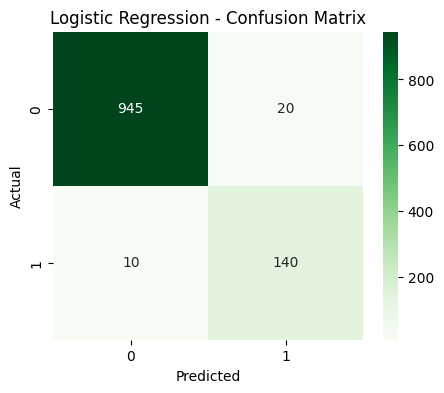

In [22]:
# Plot confusion matrix for Logistic Regression model.
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Support Vector Machine (SVM)

In [23]:
# Train and evaluate a Support Vector Machine model with hyperparameter tuning.
svm_params = {'C': [0.1, 1, 10]}
grid_svm = GridSearchCV(LinearSVC(), param_grid=svm_params, cv=5)
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)

In [24]:
# Print the results for Support Vector Machine model.
print("=== SVM ===")
print("\nBest Params:", grid_svm.best_params_)
print("\nAccuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

=== SVM ===

Best Params: {'C': 1}

Accuracy: 0.9748878923766816

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.88      0.95      0.91       150

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.95      1115
weighted avg       0.98      0.97      0.98      1115



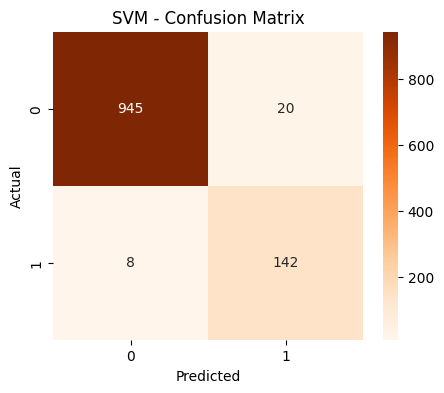

In [25]:
# Plot confusion matrix for Support Vector Machine model.
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Best Model Selection

In [26]:
# Create a dictionary to store model accuracies.
model_accuracies = {
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

In [27]:
# Find the best model based on accuracy.
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

In [28]:
# Get the best model based on the name.
best_model = {
    "Naive Bayes": grid_nb,
    "Logistic Regression": grid_lr,
    "SVM": grid_svm
}[best_model_name]

In [29]:
# Print the best model and its accuracy
print(f"Best Model: {best_model_name} with Accuracy = {best_model_accuracy}")

Best Model: SVM with Accuracy = 0.9748878923766816
